In [1]:
#importing packages 
import sqlite3    #importing sqlite package for data handling from database
import pandas as pd  #importing pandas for data preprocessing
from sklearn.linear_model import LinearRegression  #importing package to create linear model
from sklearn.model_selection import train_test_split  #importing package to generate test and train dataset
from sklearn.metrics import mean_squared_error  #to calculate mean_square_error of predicted values from actual value in model
from math import sqrt #importing sqrt for mathematical operation
from sklearn import metrics  #importing package to to calculate accuracy prediction from r2_score

In [2]:
#Creating connection.
cnx = sqlite3.connect('database.sqlite')

#selecting all data of 'Player_Attribute' table in 'df' dataframe
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#showing top 5 results
df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [5]:
df.shape

(183978, 42)

In [6]:
df.isnull().values.any()

True

In [7]:
df1 = df.dropna()

In [8]:
df1.shape

(180354, 42)

In [9]:
df1.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [10]:
df1 = df1.drop(["id", "player_fifa_api_id", "player_api_id"], axis = 1)

In [11]:
df1.columns 

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [12]:
clms = list(df1.columns[1:]) #Listing the columns of dataframe df1 starting from 2nd column
print(clms) #Printing clms list

['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [13]:
len(clms) #Lenth of the clms list

38

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(clms):
        ax.hist(df1[clms[i]])
        ax.set_title(clms[i])
plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(clms)-1:
        ax.scatter(df1[clms[i+1]], df1[clms[0]])
        ax.set_title(clms[i+1])
plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 40 Axes>

In [15]:
axes[0,0].hist(df1[clms[0]])

(array([3.3000e+01, 2.9200e+02, 2.0160e+03, 8.2530e+03, 2.8922e+04,
        5.8589e+04, 5.3453e+04, 2.3470e+04, 4.9810e+03, 3.4500e+02]),
 array([33. , 39.1, 45.2, 51.3, 57.4, 63.5, 69.6, 75.7, 81.8, 87.9, 94. ]),
 <a list of 10 Patch objects>)

In [ ]:
plt.hist(df1["preferred_foot"]) #Histogram for preferred_foot

In [19]:
#Correlation Matrix
import seaborn as  sns
import numpy as np
sns.set(style="white")
df_corr= df1[1:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
#f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
#cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
#sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask and correct aspect ratio


In [20]:
#Data for Linear Regression
df1.loc[:, "new_date"] = df1["date"].apply(pd.to_datetime) #Creating a new column new_date and changing the date time format

In [21]:
df1.loc[:, "day"] = df1["new_date"].apply(lambda x: x.day) #Creating a day column and assigning the day values of new_date column

In [22]:
df1.loc[:, "month"] = df1["new_date"].apply(lambda x: x.month) #Creating a month column and assigning the month values of new_date column

In [23]:
df1.loc[:, "year"] = df1["new_date"].apply(lambda x: x.year) #Creating a day year and assigning the year values of new_date column

In [24]:
df1["year"].unique() #Unique year values of the year column

array([2016, 2015, 2007, 2014, 2013, 2012, 2011, 2010, 2009, 2008],
      dtype=int64)

In [25]:
cat_clms =  ["preferred_foot", "attacking_work_rate", "defensive_work_rate", "year", "month", "day"] #Catagory Column List


In [26]:
df1.head()


,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,new_date,day,month,year
0,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2016-02-18,18,2,2016
1,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015-11-19,19,11,2015
2,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015-09-21,21,9,2015
3,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2015-03-20,20,3,2015
4,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2007-02-22,22,2,2007


In [27]:
df1 =  df1.drop(["date", "new_date"], axis = 1) #Dropping the date and new_date columns


In [28]:
for clm in cat_clms:
    dummies = pd.get_dummies(df1[clm], prefix = clm)
    df1 = df1.join(dummies)
    df1 = df1.drop(clm, axis = 1)

In [29]:
df1.columns #Columns of dataframe df1

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy',
       ...
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31'],
      dtype='object', length=116)

In [30]:
df1.shape

(180354, 116)

In [31]:
#Spliting the dataset into two: target value and predictor values. 
X = df1.drop('overall_rating', axis = 1) #All features except overall_rating ( predictor values )
Y = df1['overall_rating'] #overall_rating ( target value )

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape) #Training data shape (predictor values) : 80%
print(X_test.shape) #Test data shape (predictor values) : 20%
print(Y_train.shape) #Training data shape (target values) : 80%
print(Y_test.shape) #Test data shape (target values) : 20%


(144283, 115)
(36071, 115)
(144283,)
(36071,)


In [33]:
#Creating and Training the Model
lm = LinearRegression() #Creating an instance of LinearRegression
lm.fit(X_train, Y_train) #Fitting the created instance of the LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#Printing intercept 
print(lm.intercept_)

-3.3993622766243163


In [35]:
#Printing coefficients
print(lm.coef_)

[ 3.86424465e-01  2.43052499e-02  1.23932466e-02  7.27987316e-02
  3.22893045e-02  5.96675978e-03 -1.82727705e-02  8.10447096e-03
  1.28522030e-02  8.99033904e-03  1.26067864e-01  7.26557793e-03
  1.44847494e-02 -1.17529392e-02  1.98825944e-01  1.00051378e-02
  1.52496886e-02  1.17356107e-02  1.81796442e-04  5.25162101e-02
 -1.62253785e-02  2.06916748e-02  2.09904032e-02 -6.73404088e-03
  1.01773930e-02  1.66510469e-02  2.99012977e-02  1.94398387e-03
 -3.01926087e-02  1.27983365e-01  3.85557217e-02  2.00974394e-04
  5.57407945e-02  2.72966434e-02  7.71567229e-03 -7.71567229e-03
 -2.24302556e-01 -1.06630333e-01 -4.89516840e-01  1.21077428e+00
 -1.05639870e-01  1.23226900e-01 -4.35415418e-01  2.75038348e-02
 -4.47705710e-01  1.71784113e-01 -6.21478068e-01  4.26562337e-01
 -4.25076459e-01 -4.54770915e-01 -2.02643420e-01  5.83565329e-01
  8.78372118e-01  4.19666406e-01 -4.89516840e-01  2.75038348e-02
 -9.38751054e-02  4.17571581e-01 -2.86786613e-01  4.09015930e-01
  1.23226900e-01 -4.35415

In [36]:
Y_pred = lm.predict(X_test) #Calculating the prediction values
Y_pred.shape #Prediction shape from test data

(36071,)

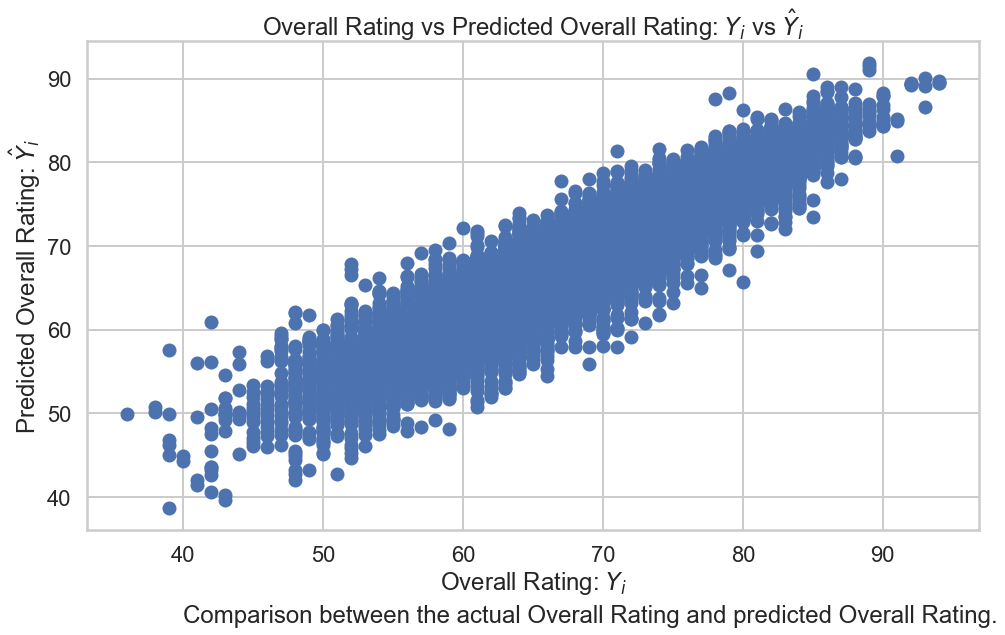

In [37]:
#To visualize the differences between actual overall rating and predicted values, creating a scatter plot.
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Overall Rating: $Y_i$")
plt.ylabel("Predicted Overall Rating: $\hat{Y}_i$")
plt.title("Overall Rating vs Predicted Overall Rating: $Y_i$ vs $\hat{Y}_i$")
plt.text(40,25, "Comparison between the actual Overall Rating and predicted Overall Rating.", ha='left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


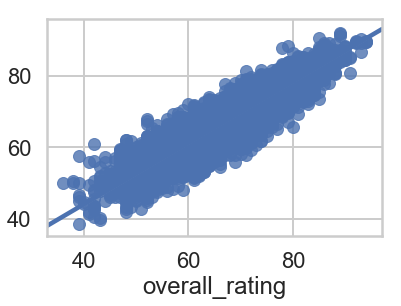

In [38]:
sns.regplot(Y_test, Y_pred, data=df1, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


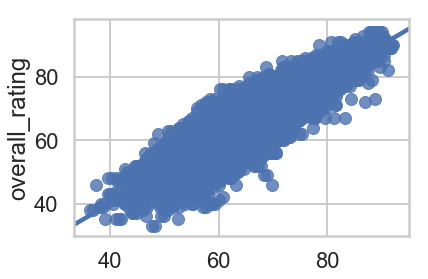

In [39]:
sns.regplot(x=lm.predict(X), y=df1['overall_rating'], data=df1, fit_reg=True) #Plot predicted and actual Overall Rating values.